<a href="https://colab.research.google.com/github/mayuripandey/Data-Analysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import tweepy
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
consumer_key= "QsmNroZ5V6ghSPJ1TEGwMA2QR"
consumer_secret_key="E7lHrsHc0P3EU6MYSHdzpmSkqXMNzCJYf6Mk9veCmoEB78pgIg"
access_token="3382755314-upIENhytORCLH3EKAQJl0GrHFbMXsfyHKfqlRna"
access_token_secret="5i4U55MU7dvwtCN5v8ZALik5XD4qZK3Jg8bkhFrVFhscu"

In [25]:
authenticate = tweepy.OAuthHandler(consumer_key,consumer_secret_key)
authenticate.set_access_token(access_token,access_token_secret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)


In [26]:
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

print("Show 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print (str(i) + ')' + tweet.full_text + '\n')
  i=i+1


Show 5 recent tweets: 

1)I’m optimistic about our ability to prevent the next pandemic. We have learned so much from COVID, and the innovations have been tremendous. https://t.co/QDfUnEbYeJ

2)The Global Fund is one of the best investments in global health. Fully funding its programs for the next 3 years is critical to ending HIV, TB, and malaria while helping ensure COVID-19 is the last pandemic. https://t.co/t4N4LhlaUb

3)At the end of the day, Paul’s most lasting impact can be found in the patients he loved so dearly—all of the people who are alive today because he dedicated his life to helping them. https://t.co/W8jVF6rcS0

4)His work will continue through Partners in Health, the incredible organization he co-founded. It is a phenomenal legacy.

5)Paul was never happier than when he was caring for patients in one of the clinics he helped create. My heart goes out to his family and friends, his colleagues, and all the people whose lives he touched.



In [27]:
#creating dataframe
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])

df.head()

,Tweets
0,I’m optimistic about our ability to prevent th...
1,The Global Fund is one of the best investments...
2,"At the end of the day, Paul’s most lasting imp..."
3,His work will continue through Partners in Hea...
4,Paul was never happier than when he was caring...


In [28]:
from typing import Text
#clean text
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\s]','',text)
  text=re.sub(r'https?:\/\/S+','',text)

  return text


df['Tweets']=df['Tweets'].apply(cleanText)


df

,Tweets
0,I’m optimistic about our ability to prevent th...
1,The Global Fund is one of the best investments...
2,"At the end of the day, Paul’s most lasting imp..."
3,His work will continue through Partners in Hea...
4,Paul was never happier than when he was caring...
...,...
95,The bipartisan Infrastructure Investment and J...
96,Data sharing and global collaboration move us ...
97,"We still have a lot of work to do, but the con..."
98,Data on student outcomes can help institutiona...


In [29]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] =  df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


df




,Tweets,Subjectivity,Polarity
0,I’m optimistic about our ability to prevent th...,0.400000,0.177778
1,The Global Fund is one of the best investments...,0.194444,0.166667
2,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000
3,His work will continue through Partners in Hea...,0.700000,0.700000
4,Paul was never happier than when he was caring...,0.000000,0.000000
...,...,...,...
95,The bipartisan Infrastructure Investment and J...,0.500000,0.300000
96,Data sharing and global collaboration move us ...,0.227273,0.068182
97,"We still have a lot of work to do, but the con...",0.000000,0.000000
98,Data on student outcomes can help institutiona...,0.431602,0.226623


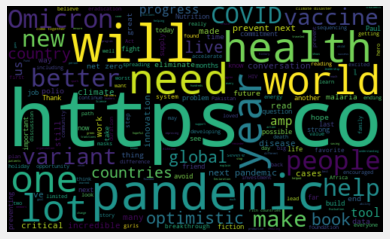

In [33]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [35]:
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df


,Tweets,Subjectivity,Polarity,Analysis
0,I’m optimistic about our ability to prevent th...,0.400000,0.177778,Positive
1,The Global Fund is one of the best investments...,0.194444,0.166667,Positive
2,"At the end of the day, Paul’s most lasting imp...",0.425000,0.325000,Positive
3,His work will continue through Partners in Hea...,0.700000,0.700000,Positive
4,Paul was never happier than when he was caring...,0.000000,0.000000,Neutral
...,...,...,...,...
95,The bipartisan Infrastructure Investment and J...,0.500000,0.300000,Positive
96,Data sharing and global collaboration move us ...,0.227273,0.068182,Positive
97,"We still have a lot of work to do, but the con...",0.000000,0.000000,Neutral
98,Data on student outcomes can help institutiona...,0.431602,0.226623,Positive


In [ ]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret_key)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)

In [ ]:
number_of_tweets = 200
tweets=[]
likes=[]
time=[]

for i in tweepy.Cursor(api.user_timeline, id='PresidentofUkr',tweet_mode="extended").items(number_of_tweets):
  tweets.append(i.full_text)
  likes.append(i.favorite_count)
  time.append(i.created_at)


In [ ]:
df=pd.DataFrame({'tweets':tweets,'likes':likes,'time':time})

In [ ]:
df

,tweets,likes,time
0,Pres. #Zelensky has inspired #Ukraine and the ...,284,2022-02-28 18:31:13
1,Mr. President address: “When I planned to beco...,411,2022-02-28 18:13:33
2,У понеділок у пристрасній промові президент @Z...,29,2022-02-28 18:01:27
3,"In a passionate speech on Monday, President @Z...",290,2022-02-28 18:00:01
4,Російські війська починають атаку на Київ неза...,11,2022-02-28 17:47:33
5,Russian forces launch an attack on Kyiv soon ...,14,2022-02-28 17:42:26
6,"Heartbroken seeing the violence facing, #Ukrai...",122,2022-02-28 17:36:07
7,⚡️Через шість годин завершився перший раунд ук...,4,2022-02-28 17:32:54
8,"⚡️After six hours, the first round of the Ukra...",25,2022-02-28 17:29:30
9,Putin has created a new super hero. “ When you...,132,2022-02-28 17:12:35


In [ ]:
from typing import Text
#clean text
def cleanText(tweets):
  tweets = re.sub(r'@[A-Za-0-9]+','',tweets)
  tweets=re.sub(r'#','',tweets)
  tweets=re.sub(r'RT[\s]','',tweets)
  tweets=re.sub(r'https?:\/\/S+','',tweets)

  return tweets


df['Tweets']=df['Tweets'].apply(cleanText)


df

KeyError: ignored